# Monte Carlo simulation: An introduction to Computational Physics
![](https://upload.wikimedia.org/wikipedia/commons/8/84/Pi_30K.gif)
[GIF Source](https://upload.wikimedia.org/wikipedia/commons/8/84/Pi_30K.gif)

### playground: [https://1969-e4687bd2-979b-4a15-a6eb-f46b23e3b2c0.ws-us03.gitpod.io/](https://1969-e4687bd2-979b-4a15-a6eb-f46b23e3b2c0.ws-us03.gitpod.io/)
    - password == 1969
    - availible only while in live session, the work individuals do will be      saved automatically for later use.
    - IN SESSION: please `duplicate` the file __MC_XYZ.ipynb__, rename it and     use it to play along the lecture.
### repo: [https://github.com/XinYaanZyoy/COMPHY_Naxxatra](https://github.com/XinYaanZyoy/COMPHY_Naxxatra)
    - those automatically saved work will be availible on this repo, while and     after the live session.
### author: [https://XinYaanZyoy.github.io](http://XinYaanZyoy.github.io)
    - which is kinda another repo and not a server based site!
### email: [mailto:XinYaanZyoy@gmail.com](mailto:XinYaanZyoy@gmail.com)
    - i'm highly active on Twitter(@XinYaanZyoy) and Discord(XinYaanZyoy#1703)   for longer discussions on natural sciences and its philosophies, 👀!


## Session 1: MC

### Prereqs
- High-School Phsysics
- High-School Calculus and Statistics
- Basic Python
- Familiarity with Jupyter

## Session 1: MC

### content
- What and Why of COMPHY
- Rational numbers on Hardware Memory
- riemann integrals
- Random number generators
- PI computation
- MC integrals (if time is with us!)
- Jupyter Play (let's do it!)


# Rationals on hardware memory
- N bits can store integers $ \in [0,2\times2^{N-1}]$
- 1B == 1 Byte = 8 bits
- powers(different from decimals):
    - K = $2^{10} \approx 10^3$
    - M = $2^{20} \approx 10^6$
    - G = $2^{30} \approx 10^9$
    - T = $2^{40} \approx 10^{12}$
- reps:
    - fixed-points (integers) (usually 32 bits)
    - floating-points (reals=rationals+irrationals) (64 bits)
    - addresses etc..

# Word size of a comp. arch.
- 8 bits words in old PCs
    - meaning 1 bit for sign and 7 bits, that is of range $2^7 = 128$ for numbers
- 32 bits words (single precision)
- 64 bit words (double precision)
    - $2^{63} = 2^{40} \times 2^{20} \times 2^3 \approx 10^{19}$

# IEEE reps
- reals can be represented by:
    - fixed-points
        - $N_{fixed} = sign \times \sum_{i=1}^n \alpha_i 2^i + \alpha_0 2^0 + \sum_{j=1}^m \alpha_{-i} 2^{-i}$ where m+n+1+1=N the number of bits required to rep a num
        - [$\pm$, 1/0 $\dots$ n times, 1/0, 1/0 $\dots$ m times]
        - absolute error of $O(2^{-m-1})$
    - floating-points
        - $N_{float} = (-1)^{sign} \times 1.mantissa \times 2^{exponent-bias}$
        - juxtaposition: [sign[1],exponent[8],mantissa]
        - $\mathbb{M} \subset \mathbb{R} $
            - machine numbers is a tiny set of reals
            - the underflows are taken cared by setting 0 usually
            - but overflows halts the execution!

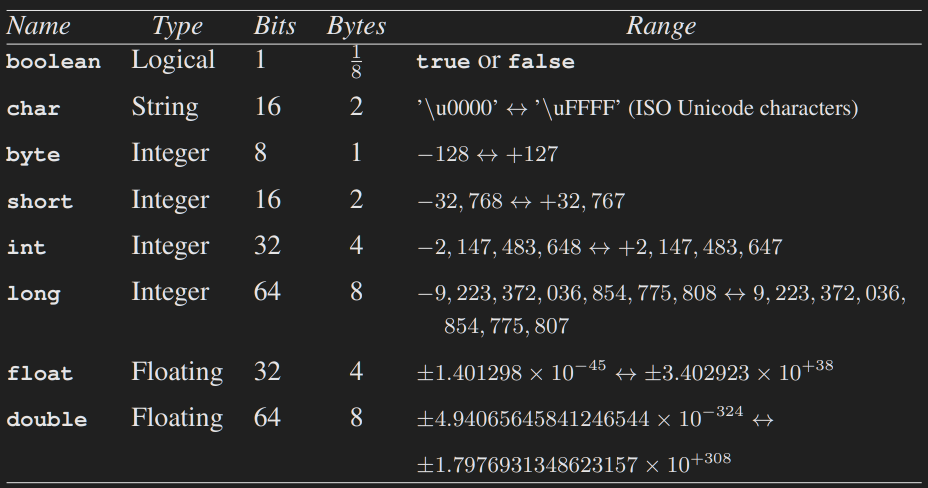

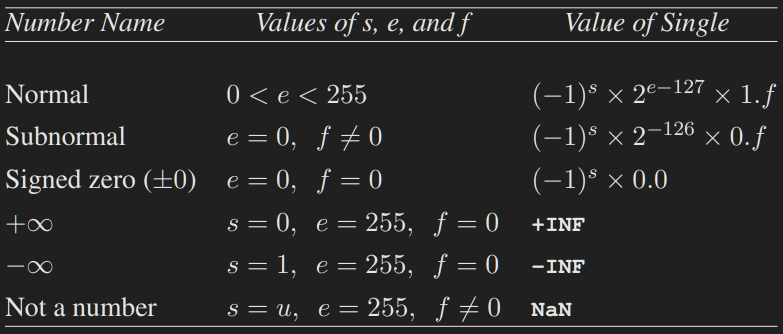

## RNG

$$\mu = \mathbb{E}(Y)$$ where Y is a distribution

generate $Y_i$s from this distribution randomly

$$\hat{\mu} = \frac{1}{n}\sum_{i=1}^nY_i$$ where $Y = f(X)$ and the var $$X \in \mathbb{D} \subseteq \mathbb{R}^d$$ has

## Riemann sums vs MC integrals
$$\int_{x_0}^{x} f(x) dx = (x-x_0) \lim_{n \to \infty}{\sum_{i=0}^n f(x_i)}$$
$$V^{d+1}=V^{d} \langle f \rangle$$
the avg of function of discrete variable tends to an integral as the size of discrete variable tends to infinity

that's a beautiful Geometry to Albegra realtion!

instead of at pre-determined nodes, we evaluate avg at randomly choosen nodes in the domain space

## How to compute $ \langle f \rangle $ ?

1. simply by riemann sums
    - that is we do sums and divide it by number of sums we did! simple!
2. something random?
    - that is randomly choosing points within the $\mathbb{D}$, i.e, a d dimensional space number in $V^d$

there exists many such ways

## Error in $ \langle f \rangle $

Error lies in the std dev of PDF of $ \langle f \rangle $

$$\langle f \rangle_j = \frac{1}{M}\sum_{i=1}^M [f(x_i)]_j$$

$$\langle f \rangle = \frac{1}{M} \sum_{j=1}^N \langle f \rangle_j$$

## PDF of $\langle f \rangle_j$

central limit theorem

PDF of $\langle f \rangle_j$ tends to Gaussian Distribution as M tends to infinity

Random Walk, d after n

$$N=n^d$$
$$Error \approx O(n^{-2}) \approx O(N^{\frac{-2}{d}})$$

comp cost $\approx O(n^{d})$

compare to age of uni

error in mc is indepedent of d $O(\sqrt{N})$

use known integral to estimate the error

- natural(real?) ones:
    - [atmospheric noice](https://www.random.org/)
    - [quantum](http://www.randomnumbers.info/) (lights/molecules)
        - https://www.idquantique.com/random-number-generation/products/quantis-random-number-generator/
    - time gap b/n two radioactive decays
    - hardware noice
        - /dev/random in unix fs: a kernel entropy pool of 4096 bits
- pseudo ones:
    - hardware noice + hashing
        - /dev/urandom in unix fs

# pseudo RNGs

- modulo/congruent:

In [12]:
def randmod(x, a, c, m):
    while True:
        x = (a*x + c)%m
        yield x

In [17]:
seed = 0
a = 4
c = 1
m = 9
l = []
for i in randmod(seed, a, c, m):
    l.append(i)
    if i==seed:
        break
print(len(l))

9


# how to test RNGs?

1. dist
    - avg
    - var
2. corre
    - kth moment
3. scatter plot!

In [18]:

import random

In [19]:
random.random()

0.8422336781104964

avg kth moment of set of random nums

$$\langle x^k \rangle = \frac{1}{N} \sum_{i=1}^N x_i^k p(x_i)$$

p(xi)=1 for uniform dist



compare riemann, mc, a-r

# improvve MC
- reduce variance (chang of var)
- fewer MC samps

## how to map to $\infty$s?

- conservation of probability 

## Samps
- shape of integrand determines sampling
- same PDF as the integrand